# School_deaths_df

### Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Read in CSV and create DataFrame

In [2]:
filepath = 'cleaned_school_shootings_1990_2018.csv'
csv = pd.read_csv(filepath)
df = pd.DataFrame(csv)

### View head and dtypes

In [3]:
df.head()

,Date,City,State,Fatalities,Year,Latitude,Longitude
0,3/27/90,Brooklyn,New York,0,1990,40.678178,-73.944158
1,5/20/90,Centerville,Tennessee,1,1990,39.628393,-84.159382
2,8/26/90,Las Vegas,Nevada,1,1990,36.169941,-115.139830
3,9/11/90,San Antonio,Texas,0,1990,29.424122,-98.493628
4,1/8/91,Richardson,Texas,0,1991,32.959623,-96.730986


### Rank cities by number of school shootings

In [4]:
def build_year_list(num_year):
    start_year = 1990
    for i in range(0, num_year-1):
        year_list.append(start_year+i)
    return year_list

In [5]:
year_list = []
fatality_counter = 0
fatalities_per_year = {}

In [6]:
build_year_list(26)

[1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014]

In [7]:
year_list

[1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014]

In [8]:
def fatality_counter(year_list):
    for i in range(len(year_list)):
        fatality_count = df[df['Year'] == year_list[i]]['Fatalities'].sum()
        fatalities_per_year.update({year_list[i]:fatality_count})
    return fatalities_per_year

In [9]:
fatality_counter(year_list)

{1990: 2,
 1991: 12,
 1992: 14,
 1993: 37,
 1994: 23,
 1995: 15,
 1996: 24,
 1997: 17,
 1998: 28,
 1999: 22,
 2000: 14,
 2001: 10,
 2002: 15,
 2003: 10,
 2004: 9,
 2005: 14,
 2006: 25,
 2007: 39,
 2008: 24,
 2009: 14,
 2010: 14,
 2011: 8,
 2012: 44,
 2013: 24,
 2014: 17}

In [10]:
school_deaths_df = pd.DataFrame(fatalities_per_year, index=[0])

In [11]:
school_deaths_df = school_deaths_df.transpose()
school_deaths_df = school_deaths_df.rename(index=str, columns={0: "value"})

In [12]:
school_deaths_df.head()

,value
1990,2
1991,12
1992,14
1993,37
1994,23


In [13]:
school_deaths_df = school_deaths_df.reset_index()

In [14]:
school_deaths_df.head()

,index,value
0,1990,2
1,1991,12
2,1992,14
3,1993,37
4,1994,23


In [15]:
school_deaths_df = school_deaths_df.rename(index=str, columns={'index': "year"})

In [16]:
school_deaths_df.head()

,year,value
0,1990,2
1,1991,12
2,1992,14
3,1993,37
4,1994,23


In [ ]:
# One way to work with list/dicts data
# lists = fatalities_per_year.items()

In [ ]:
# One way to unpack a dict into its key and value
# x, y = zip(*lists)

In [17]:
y = school_deaths_df.value

In [18]:
x = school_deaths_df.year

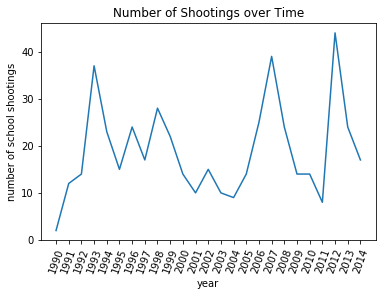

In [19]:
plt.plot(x,y)
plt.xlabel('year')
plt.ylabel('number of school shootings')
plt.title('Number of Shootings over Time')
plt.xticks(rotation=70)
plt.show()